In [128]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import operator

In [129]:
df = pd.read_csv('./../8V280L8VQ-clash-royale-da.csv', sep=',')

In [130]:
df = df.sort_index(axis=0, ascending=False)

In [131]:
def arena(trophies):
    if trophies < 400:
        return '1'
    elif trophies < 800:
        return '2'
    elif trophies < 1100:
        return '3'
    elif trophies < 1400:
        return '4'
    elif trophies < 1700:
        return '5'
    elif trophies < 2000:
        return '6'
    elif trophies < 2300:
        return '7'
    elif trophies < 2600:
        return '8'
    elif trophies < 3000:
        return '9'
    elif trophies < 3400:
        return '10'
    elif trophies < 3800:
        return '11'
    else: 
        return '12'

In [132]:
df['arena'] = df['my_trophies'].apply(lambda row: arena(row))

In [133]:
pd.set_option('display.max_columns', None)  
df.describe()

,my_score,points,opponent_score,my_trophies,opponent_trophies,my_deck_elixir,op_deck_elixir,my_troops,my_buildings,my_spells,op_troops,op_buildings,op_spells,my_commons,my_rares,my_epics,my_legendaries,op_commons,op_rares,op_epics,op_legendaries,op_Mortar,op_Spear_Goblins,op_Baby_Dragon,op_Barbarians,op_P.E.K.K.A,op_Battle_Ram,op_Three_Musketeers,op_Barbarian_Hut,op_Skeletons,op_Giant,op_Balloon,op_The_Log,op_Musketeer,op_Archers,op_Princess,op_Zap,op_Hog_Rider,op_Mini_P.E.K.K.A,op_Knight,op_Bomber,op_Electro_Wizard,op_Elixir_Collector,op_Giant_Skeleton,op_Furnace,op_Tornado,op_Skeleton_Barrel,op_Sparky,op_Ice_Wizard,op_Rocket,op_Witch,op_Bomb_Tower,op_Valkyrie,op_Goblin_Barrel,op_Inferno_Dragon,op_Goblin_Gang,op_Tesla,op_Poison,op_Fire_Spirits,op_Minion_Horde,op_Freeze,op_Rage,op_Prince,op_Goblins,op_Mirror,op_Royal_Giant,op_X-Bow,op_Tombstone,op_Minions,op_Inferno_Tower,op_Lumberjack,op_Lava_Hound,op_Mega_Knight,op_Skeleton_Army,op_Fireball,op_Goblin_Hut,op_Arrows,op_Golem,op_Cannon,op_Miner,op_Clone,op_Ice_Golem,op_Graveyard,op_Lightning,op_Wizard,op_Elite_Barbarians,op_Bandit,op_Ice_Spirit,op_Dark_Prince,my_Cannon,my_Minions,my_Goblin_Barrel,my_Fireball,my_Fire_Spirits,my_Baby_Dragon,my_Mini_P.E.K.K.A,my_Prince,my_Hog_Rider,my_Furnace,my_Spear_Goblins,my_Bomber,my_Archers,my_Rage,my_Zap,my_Arrows,my_Witch,my_Goblins,my_Mega_Knight,my_Musketeer,my_Knight,my_Valkyrie,my_Inferno_Tower,my_Balloon,my_Giant,my_Mortar,my_Skeleton_Army
count,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000,427.000000
mean,1.440281,5.114754,1.451991,1487.149883,1486.393443,3.484192,3.985363,4.721311,0.690867,2.587822,5.985948,0.388759,1.625293,3.381733,1.845433,2.693208,0.079625,1.971897,2.395785,3.459016,0.173302,0.039813,1.234192,1.042155,0.288056,0.252927,0.077283,0.011710,0.114754,0.112412,0.658080,0.569087,0.016393,1.105386,0.857143,0.007026,0.700234,0.700234,1.014052,1.119438,0.894614,0.011710,0.072600,0.259953,0.063232,0.086651,0.117096,0.009368,0.032787,0.405152,0.964871,0.046838,1.585480,0.512881,0.035129,0.014052,0.131148,0.039813,0.362998,2.037471,0.039813,0.313817,0.922717,0.341920,0.243560,0.042155,0.088993,0.105386,0.583138,0.182670,0.004684,0.025761,0.002342,1.274005,0.925059,0.501171,2.086651,0.037471,0.067916,0.021077,0.002342,0.016393,0.021077,0.093677,1.250585,0.079625,0.004684,0.016393,0.007026,1.395785,5.346604,1.039813,3.192037,0.182670,1.297424,0.718970,0.021077,0.496487,0.487119,3.224824,0.473068,0.323185,0.014052,2.393443,3.358314,0.475410,0.529274,0.079625,0.440281,0.512881,0.009368,0.398126,0.833724,0.271663,1.531616,0.805621
std,0.972904,25.339080,1.074421,507.735168,512.598677,0.211638,0.463617,0.695114,0.723830,0.492804,1.023108,0.626987,0.976300,0.779397,0.824790,0.904878,0.271030,1.358042,1.194778,1.524474,0.546383,0.485284,

## Trophies over time (battles)

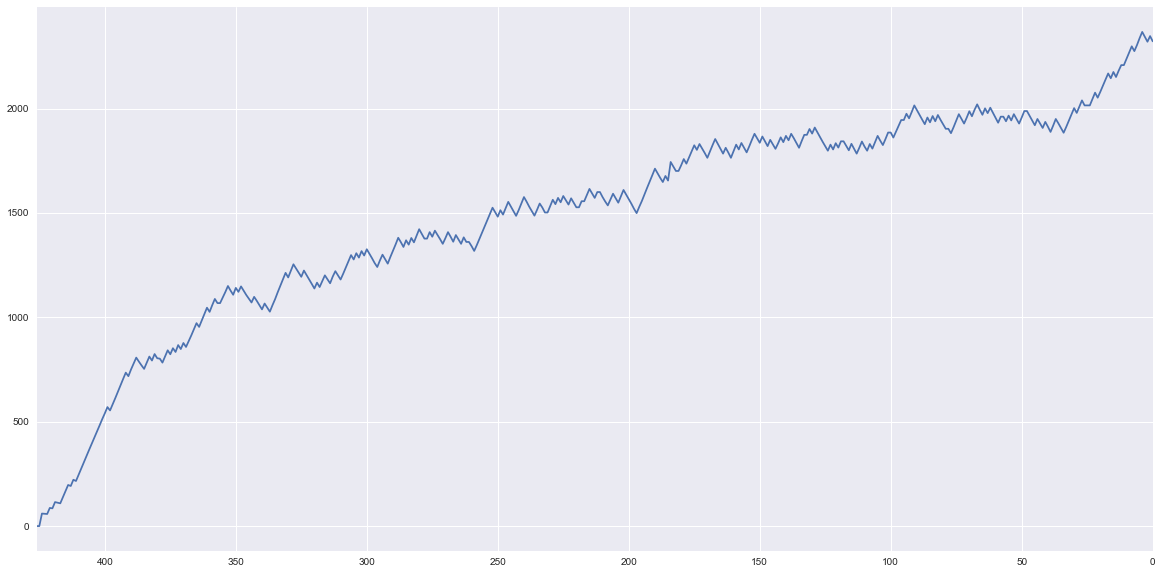

In [134]:
(df['my_trophies'].rolling(window = 1)
     .mean()
     .plot(figsize=(20, 10)))

## Difference of trophies between me and my opponents

In [135]:
df_diff_troph = df[['my_trophies', 'opponent_trophies']]

df_diff_troph = df_diff_troph.assign(troph_diff = df.my_trophies - df.opponent_trophies)

In [136]:
df_diff_troph['troph_diff'].describe()

count    427.000000
mean       0.756440
std       50.162522
min      -86.000000
25%      -49.000000
50%       19.000000
75%       47.000000
max       87.000000
Name: troph_diff, dtype: float64

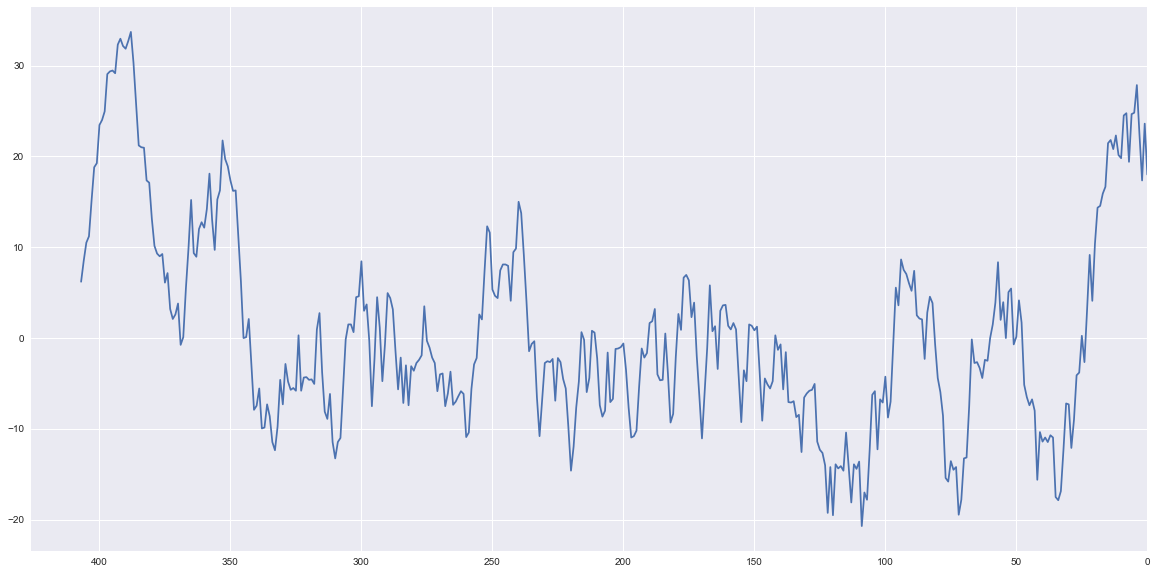

In [137]:
(df_diff_troph['troph_diff'].rolling(window = 20)
     .mean()
     .plot(figsize=(20, 10)))

### Number of battles I had more trophies than my opponent

In [138]:
df_diff_troph[df_diff_troph.troph_diff > 0]['troph_diff'].describe()

count    221.000000
mean      46.438914
std       15.736816
min        6.000000
25%       35.000000
50%       46.000000
75%       55.000000
max       87.000000
Name: troph_diff, dtype: float64

### Number of battles I had more trophies than my opponent

In [139]:
df_diff_troph[df_diff_troph.troph_diff < 0]['troph_diff'].describe()

count    203.000000
mean     -48.965517
std       16.407068
min      -86.000000
25%      -58.500000
50%      -50.000000
75%      -40.500000
max       -4.000000
Name: troph_diff, dtype: float64

### Number of battles me and the opponent had the same trophies

In [140]:
df_diff_troph[df_diff_troph.troph_diff == 0]['troph_diff'].describe()

count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: troph_diff, dtype: float64

## Opponents' elixir

In [141]:
df['op_deck_elixir'].describe()

count    427.000000
mean       3.985363
std        0.463617
min        2.125000
25%        3.625000
50%        4.000000
75%        4.250000
max        5.375000
Name: op_deck_elixir, dtype: float64

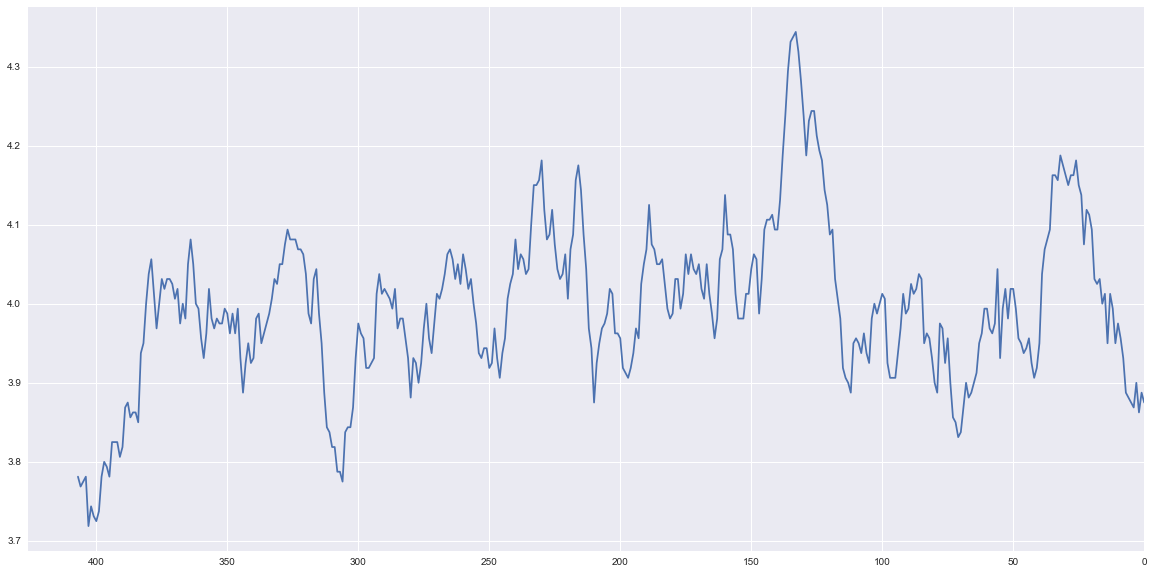

In [142]:
(df['op_deck_elixir'].rolling(window = 20)
     .mean()
     .plot(figsize=(20, 10)))

### Median deck elixir cost by arena

In [143]:
df[['op_deck_elixir', 'arena']].groupby(['arena']).median()

,op_deck_elixir
arena,
1,3.6875
2,4.0000
3,4.0000
4,3.8750
5,4.0000
6,4.0000
7,3.8750
8,3.8750


## Opponents' elixir based on my battle result

In [144]:
df[df.my_result == 'Victory']['op_deck_elixir'].describe()

count    213.000000
mean       3.955986
std        0.495899
min        2.125000
25%        3.625000
50%        4.000000
75%        4.250000
max        5.375000
Name: op_deck_elixir, dtype: float64

In [145]:
df[df.my_result == 'Defeat']['op_deck_elixir'].describe()

count    196.000000
mean       4.028699
std        0.425798
min        3.125000
25%        3.750000
50%        4.000000
75%        4.375000
max        5.250000
Name: op_deck_elixir, dtype: float64

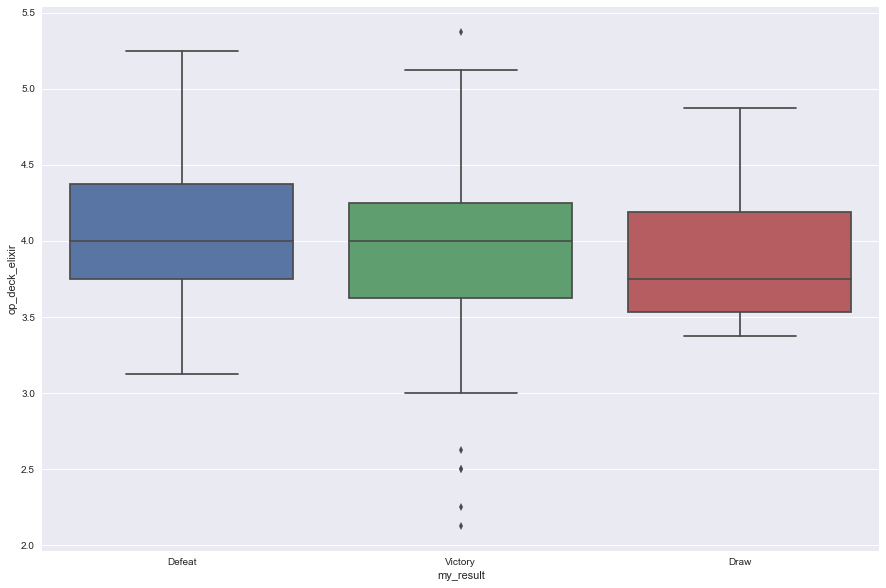

In [146]:
sns.plt.figure(figsize=(15, 10))
sns.boxplot(x=df['my_result'], y=df['op_deck_elixir'])
sns.plt.show()

### Exploring arenas

#### Number of battles played in each arena

In [156]:
df.groupby(['arena'])['points'].count()

arena
1     22
2     22
3     39
4     83
5     75
6    152
7     27
8      7
Name: points, dtype: int64

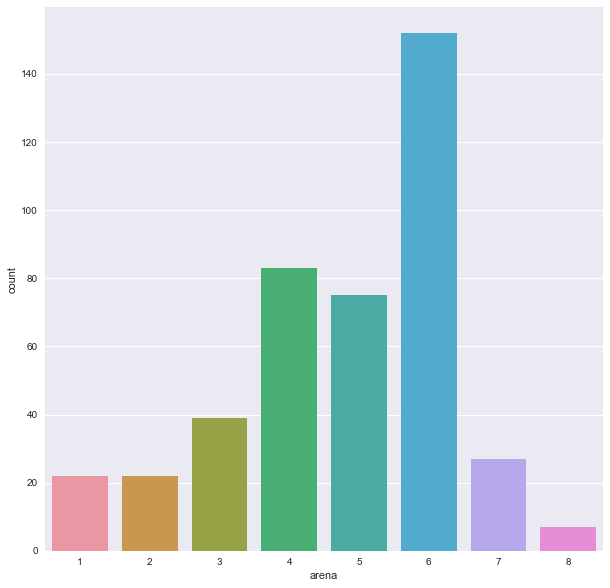

In [157]:
sns.plt.figure(figsize=(10, 10))
sns.countplot(x = df['arena'])
sns.plt.show() 

#### Stats by arena

In [107]:
def op_cards_median_level(battles_by_result):
    return np.mean(list(filter(lambda x: x != 0, [y for x in battles_by_result.filter(regex=('op_[A-Z]')).values.tolist() for y in x] )) )


def top_op_cards(n, battles_by_result):
    aux_cards_dict = {}

    aux_filtered_df = battles_by_result.filter(regex=('op_[A-Z]'))
    
    for row in aux_filtered_df.itertuples(index=False):
        for col in row._fields:        
            if not col.startswith('_'):
                if getattr(row, col) > 0:
                    if col in aux_cards_dict:
                        aux_cards_dict[col] = aux_cards_dict[col] + 1
                    else:
                        aux_cards_dict[col] = 1

    return pd.DataFrame(data=sorted(aux_cards_dict.items(), key=operator.itemgetter(1), reverse=True), columns=['Card', 'Times_Used']).head(n)    

~~~ Arena 8 stats ~~~
Total battles in arena 8: 7
-------
my_result
Defeat     3
Victory    4
Name: arena, dtype: int64


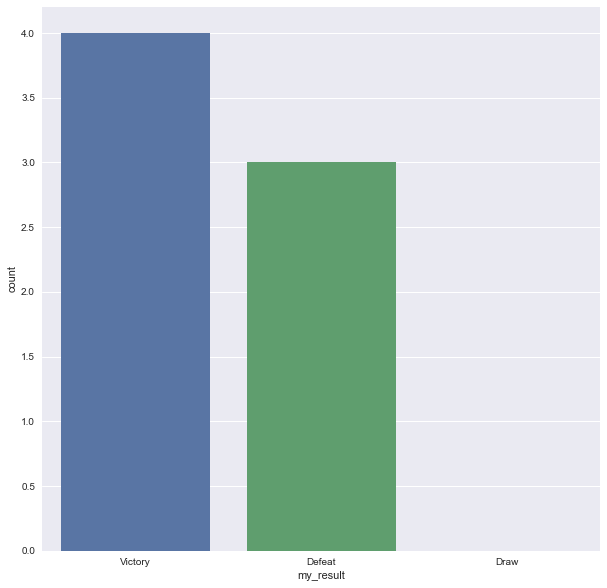

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           1.0        2.0        6.0           0.5        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       1.0       2.0         1.5       3.0       3.0

Opponents' cards median level
4.46875

Top 20 opponents' cards
                   Card  Times_Used
0          op_Hog_Rider           3
1             op_Wizard           2
2              op_Witch           2
3           op_Fireball           2
4               op_Rage           2
5      op_Skeleton_Army           2
6         op_Battle_Ram           2
7       op_Fire_Spirits           1
8             op_Arrows           1
9          op_Musketeer           1
10           op_Balloon           1
11     op_Spear_Goblins           1
12               op_Zap           1
13           op_Minions           1
14             op_Golem           1
15            op_Freez

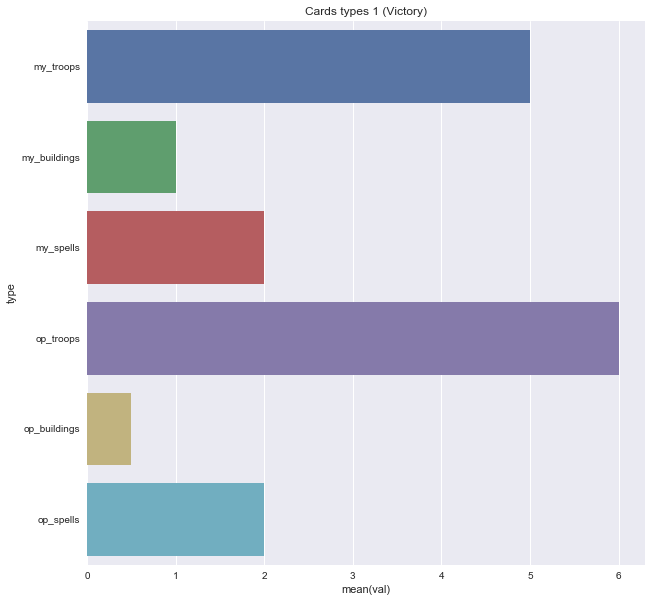

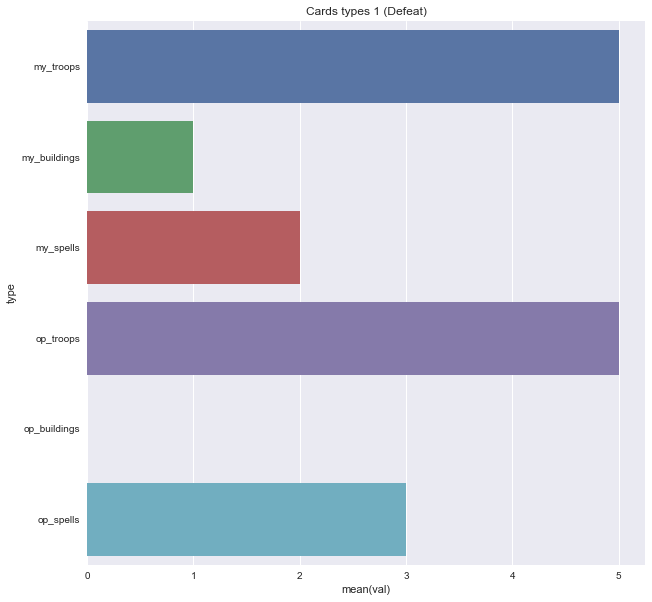

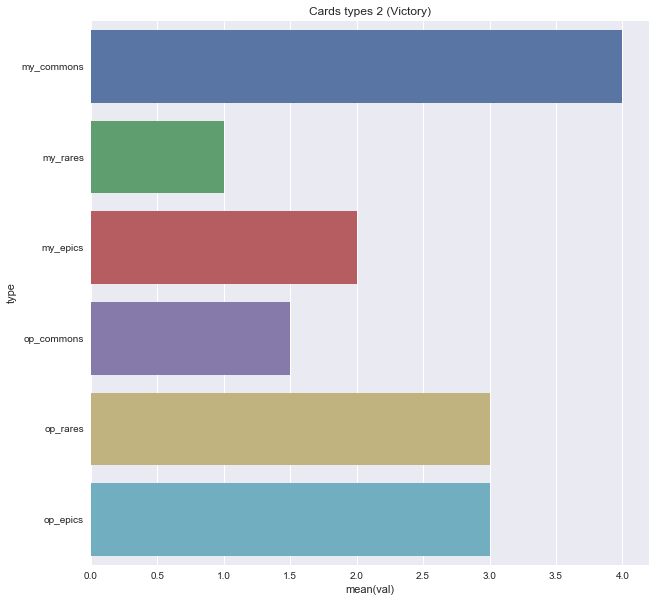

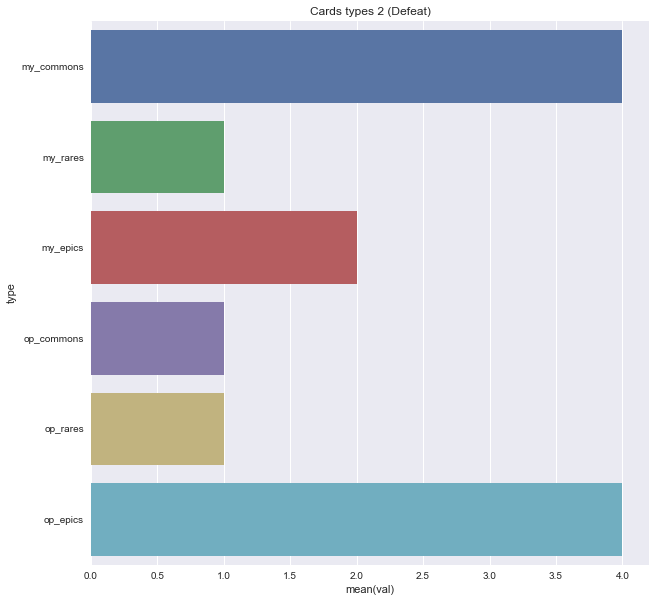

------------------------------------------------

~~~ Arena 7 stats ~~~
Total battles in arena 7: 27
-------
my_result
Defeat      5
Draw        3
Victory    19
Name: arena, dtype: int64


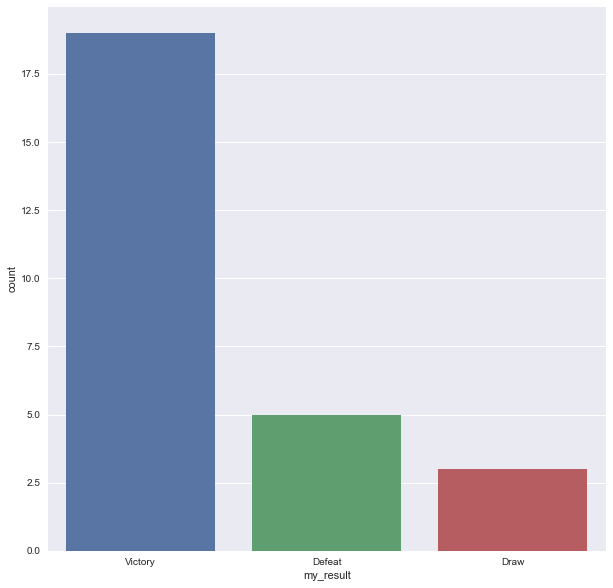

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           1.0        2.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       1.0       2.0         2.0       2.0       3.0

Opponents' cards median level
4.23026315789

Top 20 opponents' cards
                   Card  Times_Used
0      op_Skeleton_Army          15
1             op_Wizard          11
2           op_Valkyrie          10
3       op_Minion_Horde          10
4              op_Witch           8
5      op_Goblin_Barrel           7
6             op_Arrows           7
7            op_Balloon           7
8        op_Baby_Dragon           7
9           op_Fireball           6
10            op_Prince           6
11           op_Tornado           5
12         op_Musketeer           4
13              op_Rage           4
14         op_Hog_Rider           4
15            op

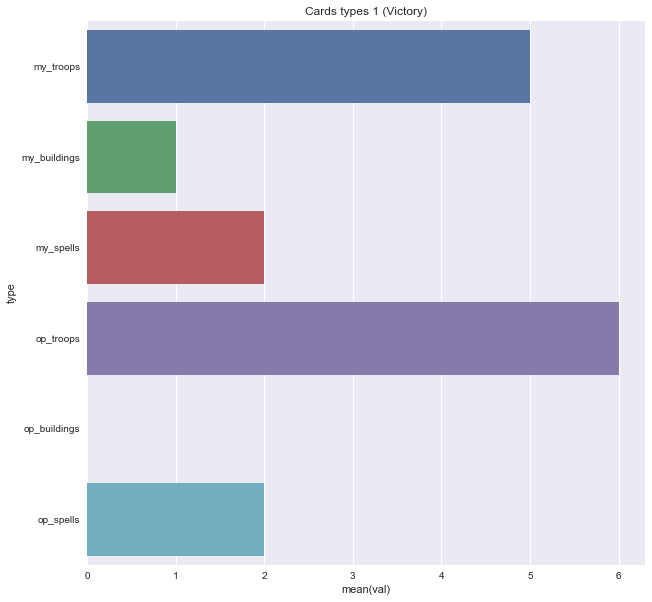

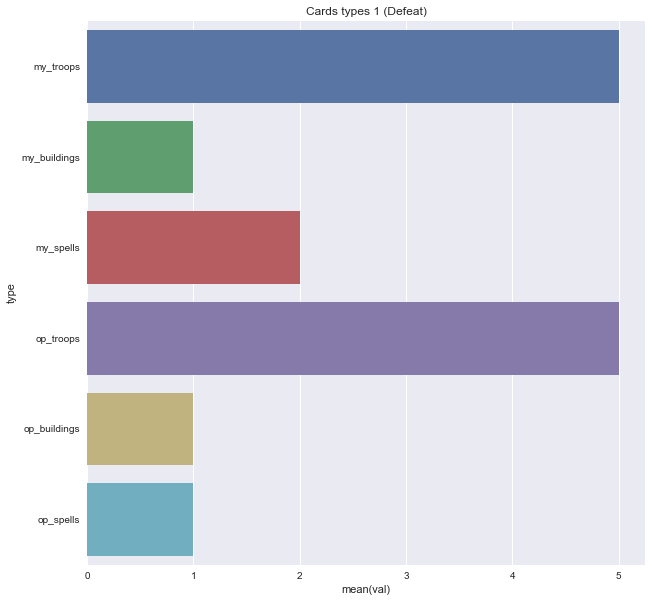

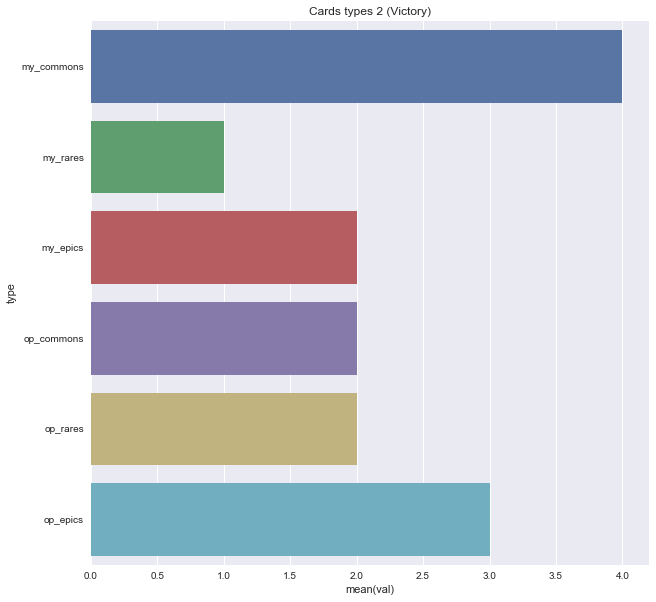

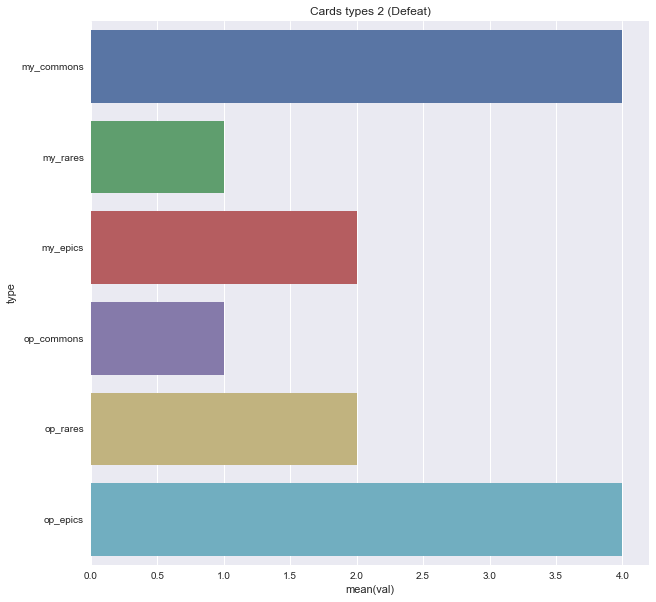

------------------------------------------------

~~~ Arena 6 stats ~~~
Total battles in arena 6: 152
-------
my_result
Defeat     79
Draw        8
Victory    65
Name: arena, dtype: int64


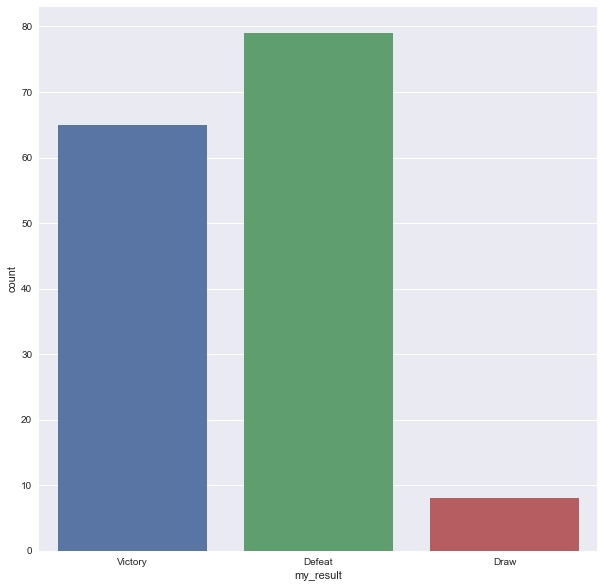

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        4.0           1.0        3.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         3.0       2.0       3.0         1.0       2.0       4.0

Opponents' cards median level
3.78076923077

Top 20 opponents' cards
                 Card  Times_Used
0    op_Skeleton_Army          48
1           op_Wizard          33
2            op_Witch          29
3           op_Prince          28
4      op_Baby_Dragon          25
5         op_Valkyrie          25
6     op_Minion_Horde          24
7           op_Arrows          23
8          op_Balloon          21
9           op_Mirror          18
10   op_Goblin_Barrel          16
11       op_Musketeer          16
12       op_Hog_Rider          14
13             op_Zap          13
14  op_Giant_Skeleton          13
15            op_Rage          11
16        op_F

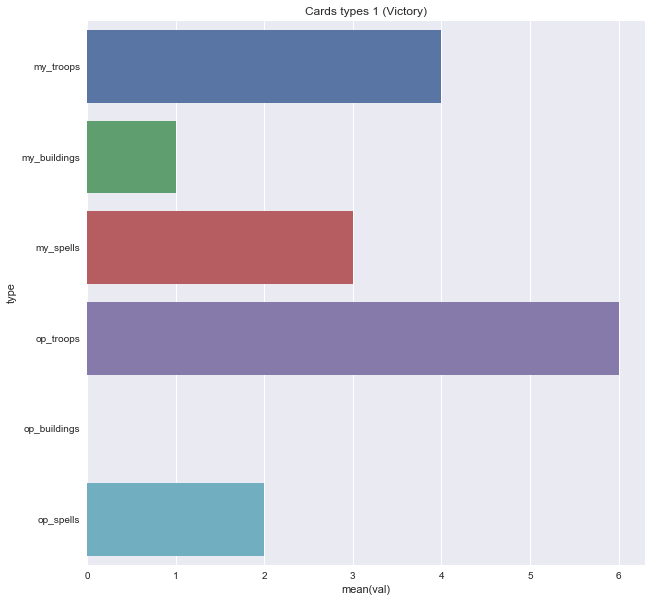

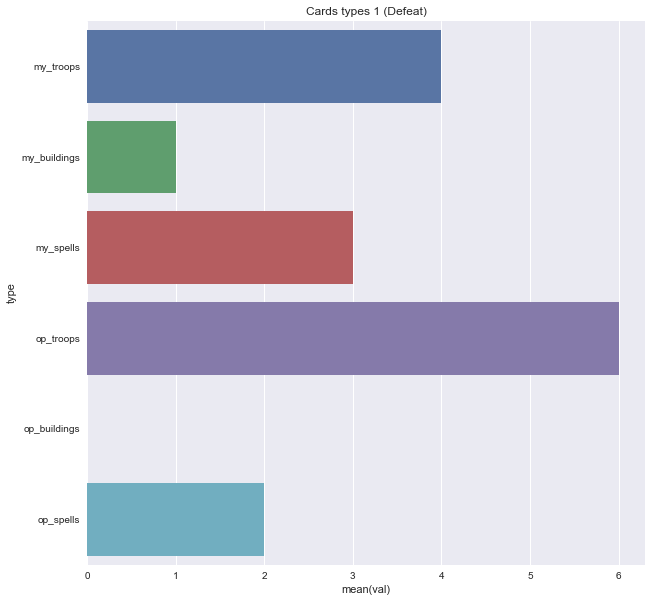

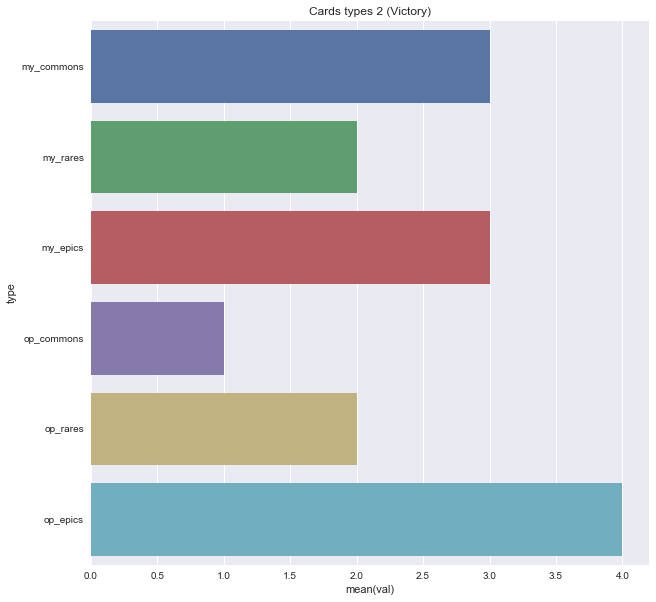

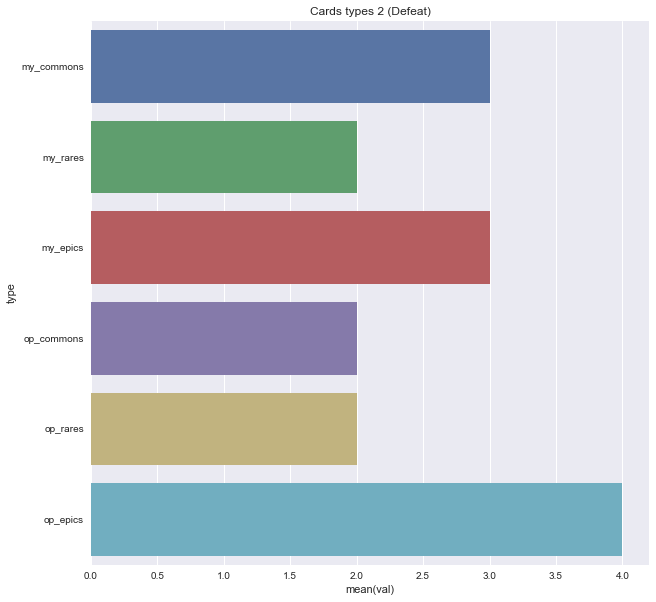

------------------------------------------------

~~~ Arena 5 stats ~~~
Total battles in arena 5: 75
-------
my_result
Defeat     34
Draw        4
Victory    37
Name: arena, dtype: int64


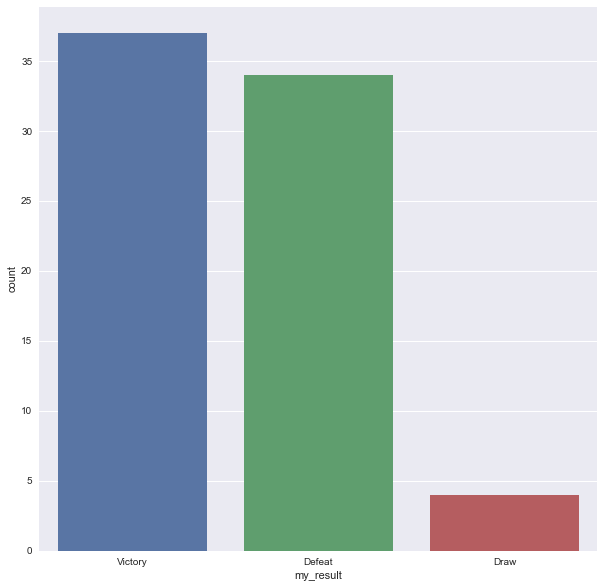

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           1.0        2.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       1.0       3.0         2.0       2.0       4.0

Opponents' cards median level
3.34459459459

Top 20 opponents' cards
                Card  Times_Used
0   op_Skeleton_Army          30
1     op_Baby_Dragon          25
2           op_Witch          21
3          op_Prince          17
4    op_Minion_Horde          17
5          op_Wizard          14
6   op_Goblin_Barrel          13
7       op_Musketeer          13
8        op_Valkyrie          12
9   op_Spear_Goblins          10
10       op_Fireball           9
11         op_Arrows           8
12        op_Balloon           8
13          op_Giant           7
14           op_Rage           7
15      op_Hog_Rider           7
16     op_Goblin_Hut           

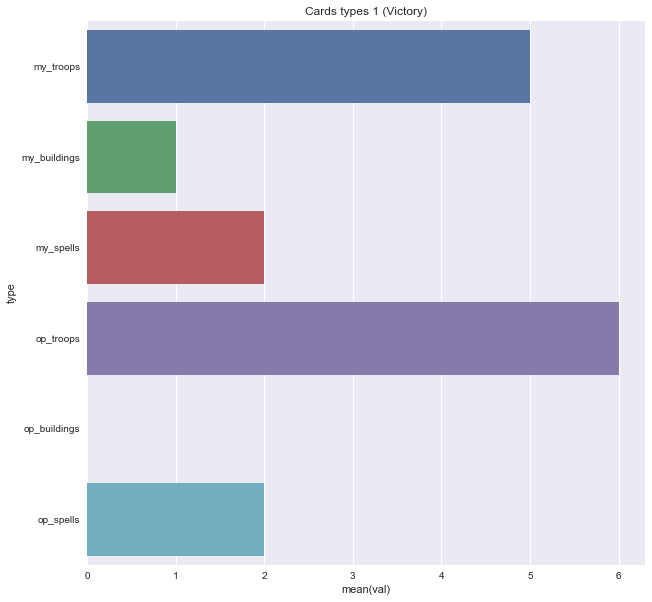

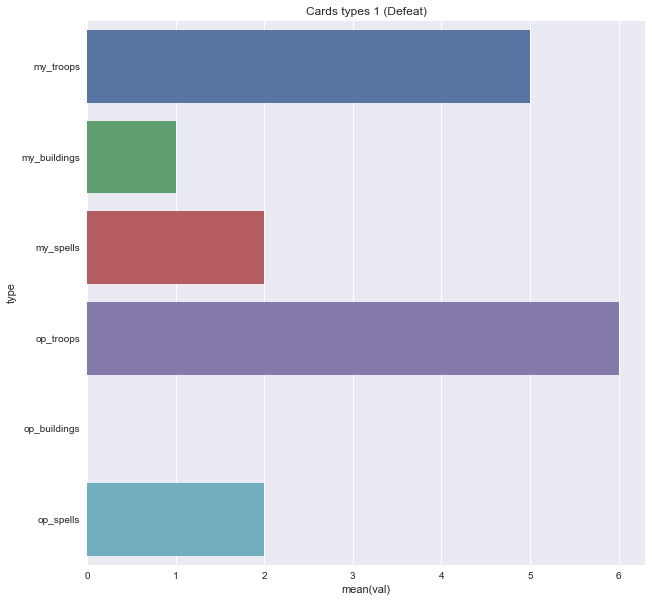

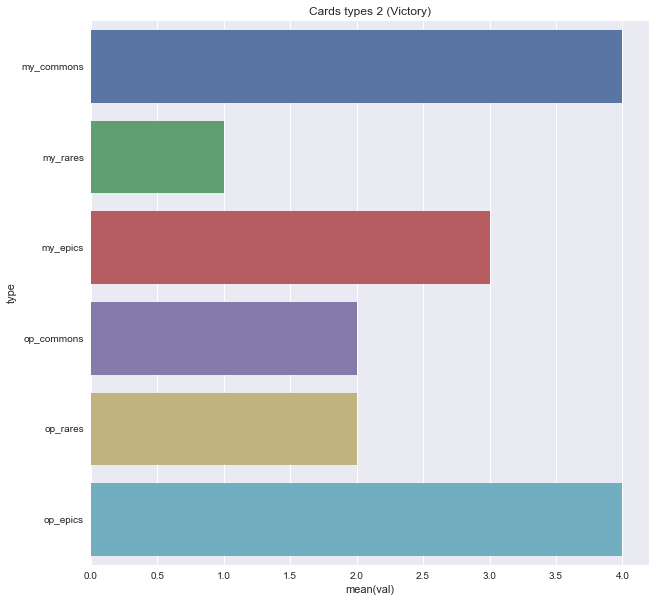

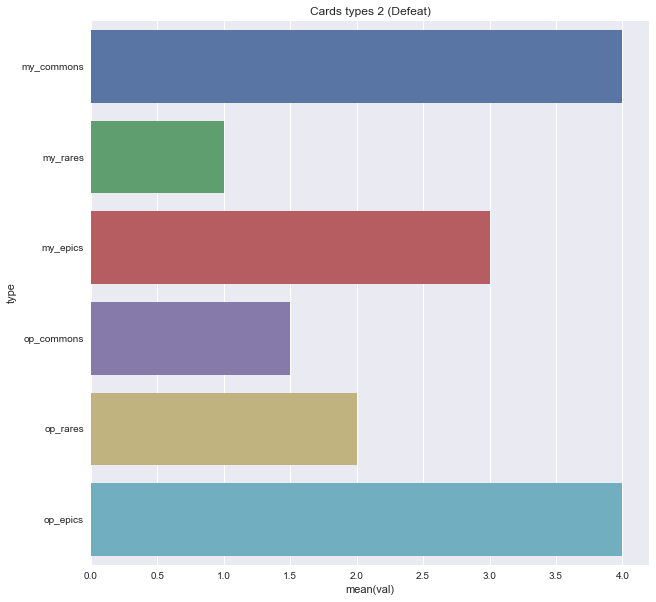

------------------------------------------------

~~~ Arena 4 stats ~~~
Total battles in arena 4: 83
-------
my_result
Defeat     44
Draw        2
Victory    37
Name: arena, dtype: int64


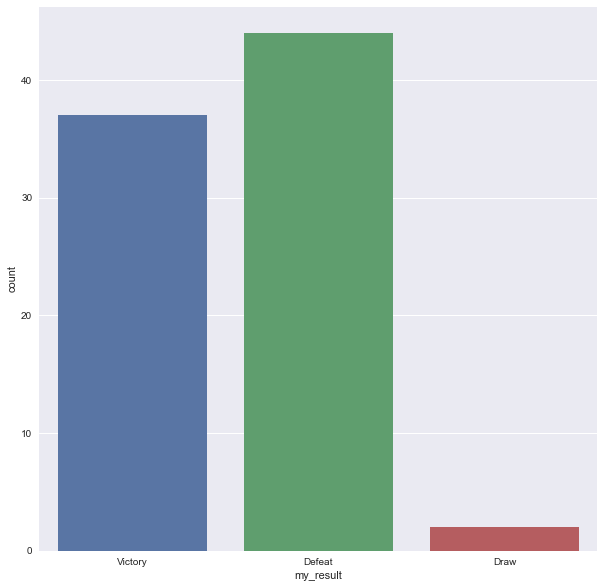

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         3.0       2.0       3.0         2.0       2.0       4.0

Opponents' cards median level
2.85810810811

Top 20 opponents' cards
                 Card  Times_Used
0    op_Skeleton_Army          28
1      op_Baby_Dragon          23
2           op_Prince          22
3           op_Arrows          19
4            op_Witch          18
5    op_Goblin_Barrel          16
6         op_Valkyrie          14
7        op_Musketeer          13
8         op_Fireball          13
9           op_Bomber          11
10    op_Minion_Horde          10
11         op_Balloon           9
12          op_Knight           9
13           op_Giant           8
14         op_Minions           7
15   op_Spear_Goblins           6
16       op_Ho

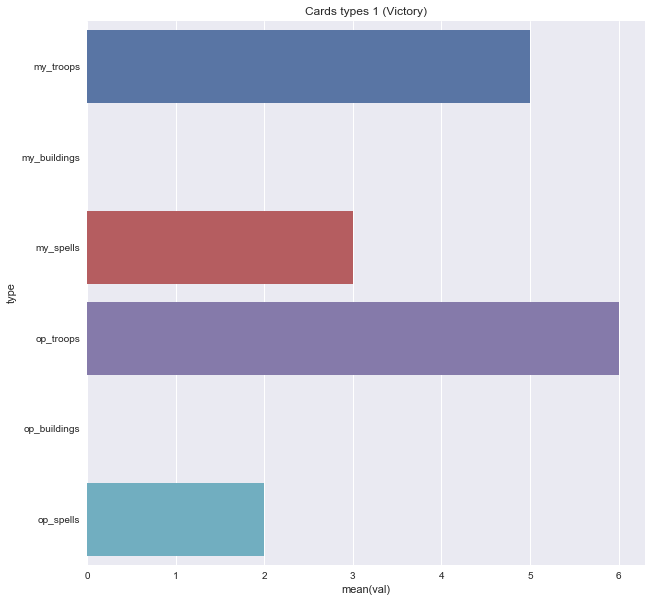

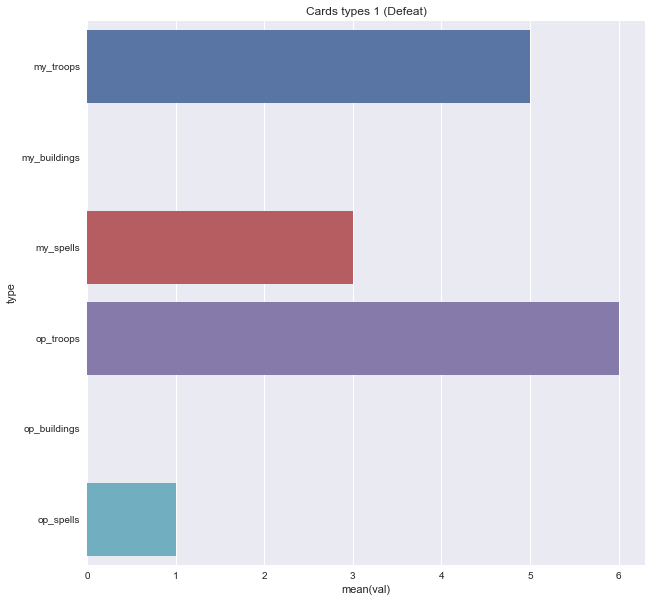

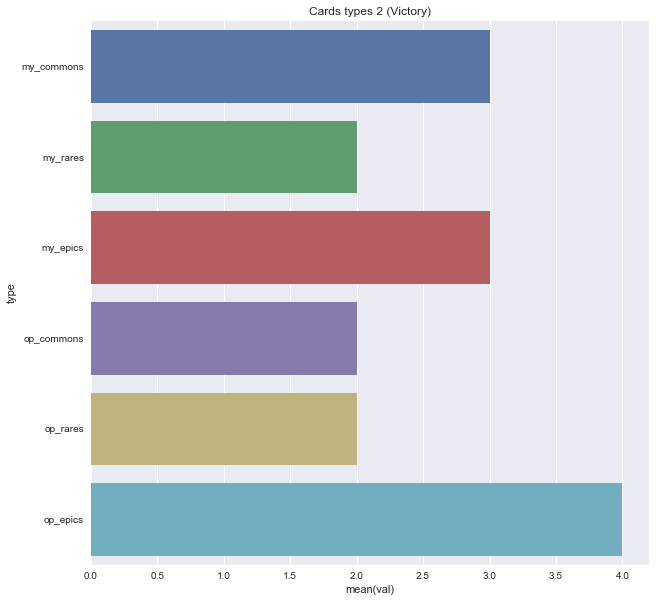

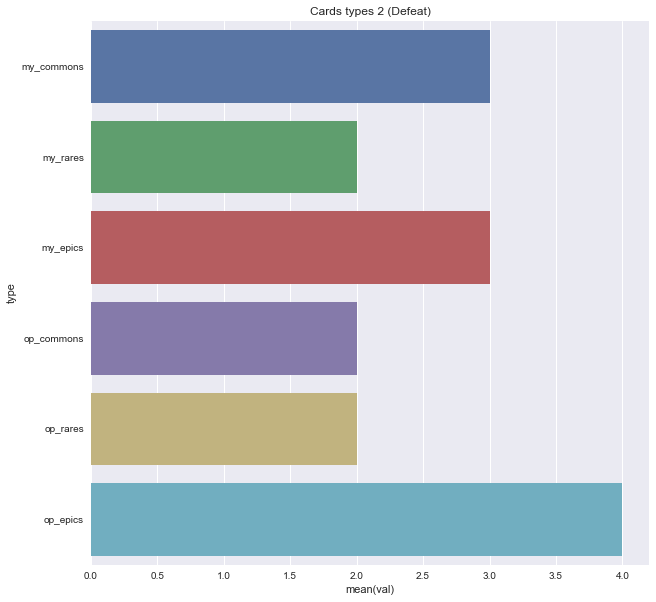

------------------------------------------------

~~~ Arena 3 stats ~~~
Total battles in arena 3: 39
-------
my_result
Defeat     16
Draw        1
Victory    22
Name: arena, dtype: int64


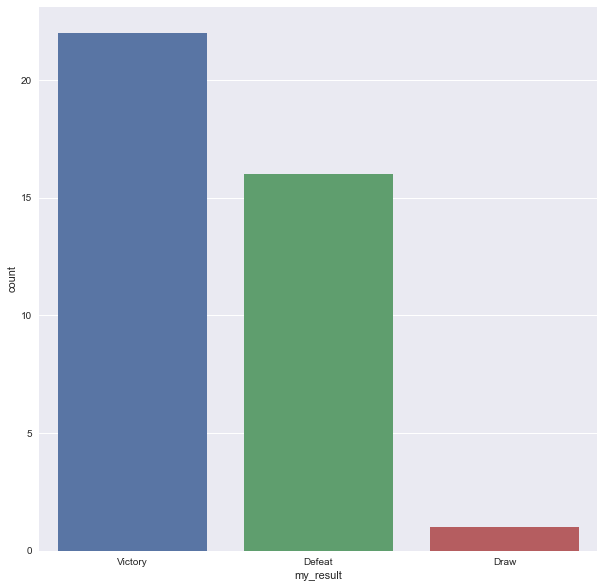

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           1.0        1.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         3.0       3.0       2.0         2.0       3.0       3.5

Opponents' cards median level
2.44886363636

Top 20 opponents' cards
                Card  Times_Used
0     op_Baby_Dragon          14
1           op_Witch          12
2        op_Fireball          12
3        op_Valkyrie          12
4   op_Skeleton_Army          12
5          op_Prince          11
6       op_Musketeer           9
7          op_Knight           9
8   op_Spear_Goblins           8
9           op_Giant           8
10         op_Arrows           6
11         op_Bomber           6
12        op_Minions           5
13     op_Goblin_Hut           5
14         op_Rocket           4
15        op_Archers           4
16  op_Goblin_Barrel           

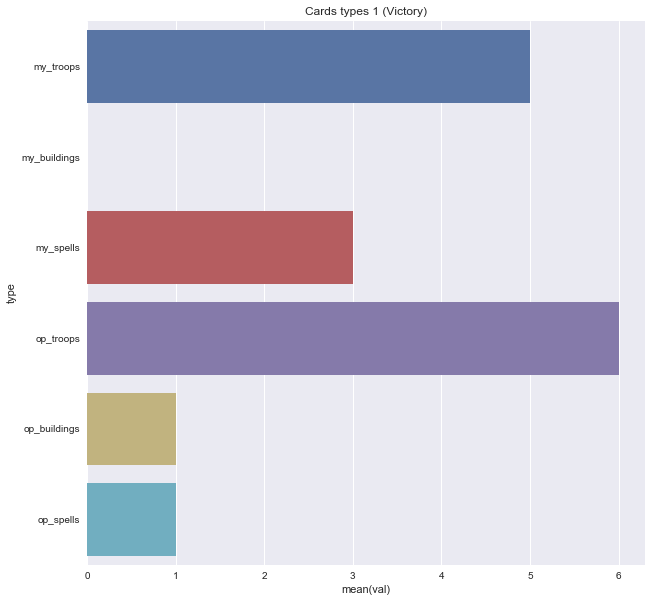

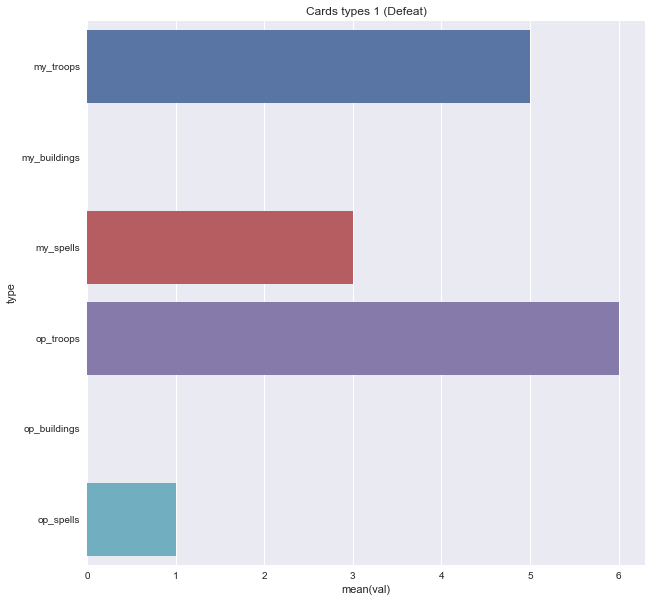

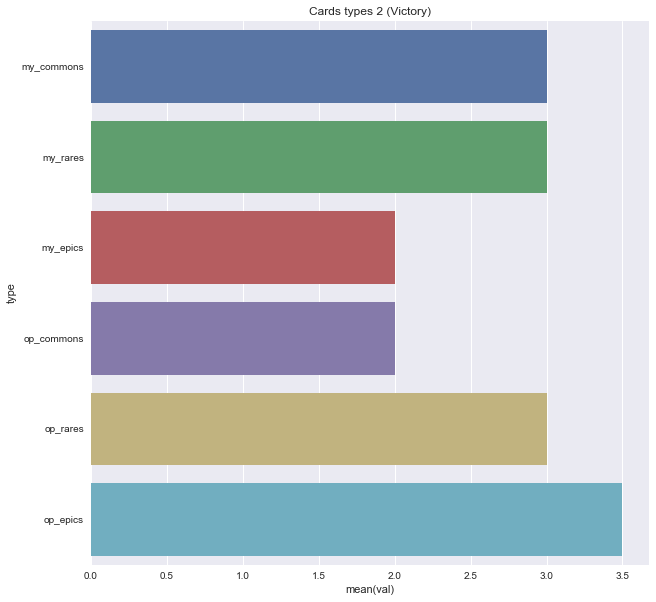

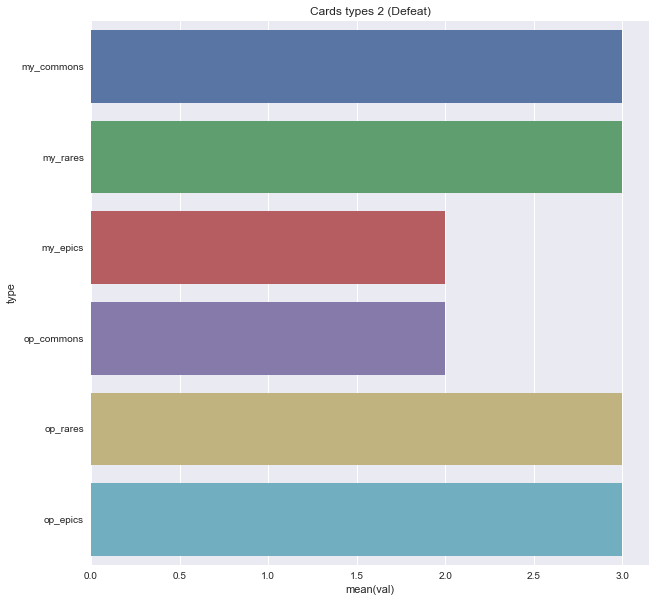

------------------------------------------------

~~~ Arena 2 stats ~~~
Total battles in arena 2: 22
-------
my_result
Defeat      7
Victory    15
Name: arena, dtype: int64


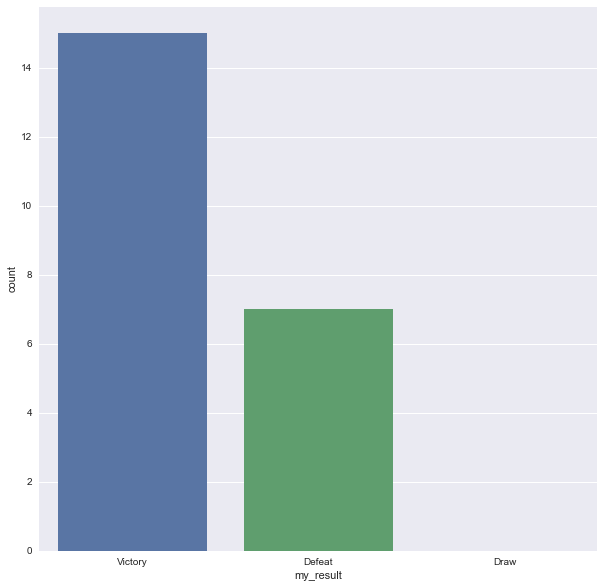

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           0.0        1.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       2.0       2.0         2.0       3.0       3.0

Opponents' cards median level
2.4

Top 20 opponents' cards
                Card  Times_Used
0           op_Witch           9
1          op_Prince           9
2   op_Skeleton_Army           9
3       op_Musketeer           8
4     op_Baby_Dragon           8
5           op_Giant           7
6        op_Valkyrie           7
7   op_Goblin_Barrel           6
8        op_Fireball           6
9   op_Spear_Goblins           6
10        op_Archers           6
11      op_Lightning           5
12        op_Minions           4
13         op_Knight           4
14         op_Arrows           3
15         op_Bomber           3
16      op_Skeletons           3
17     o

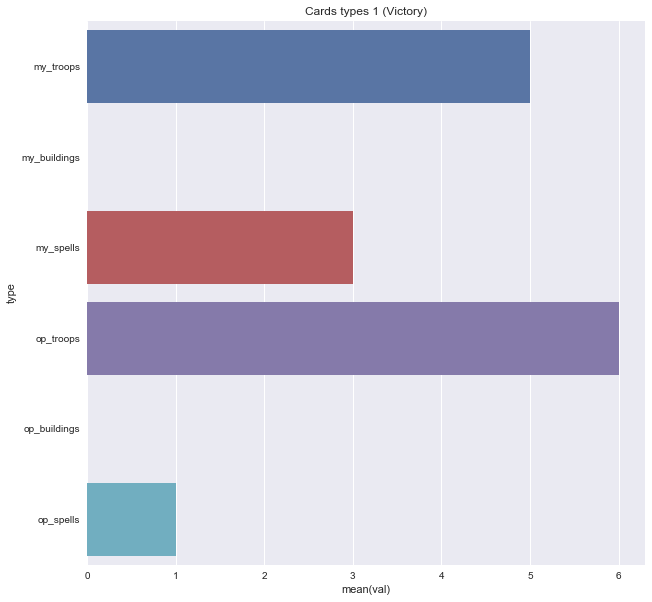

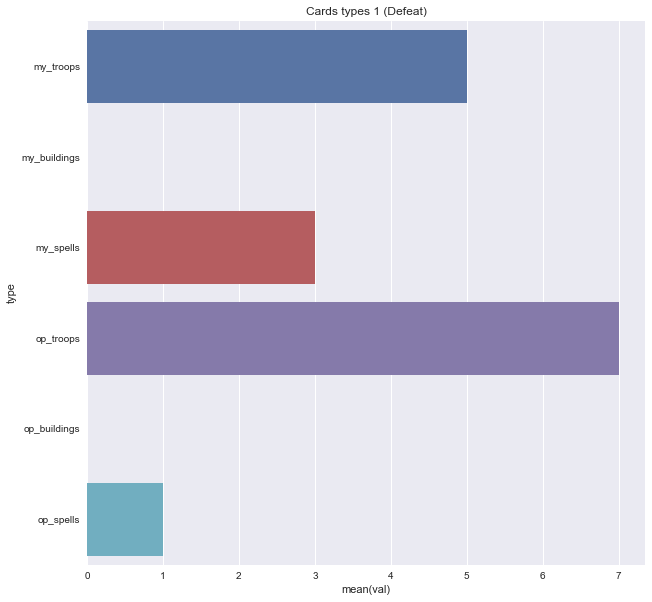

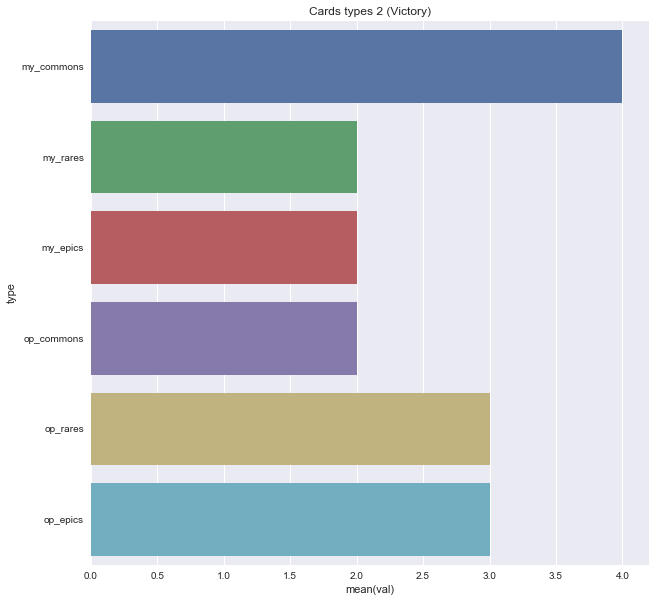

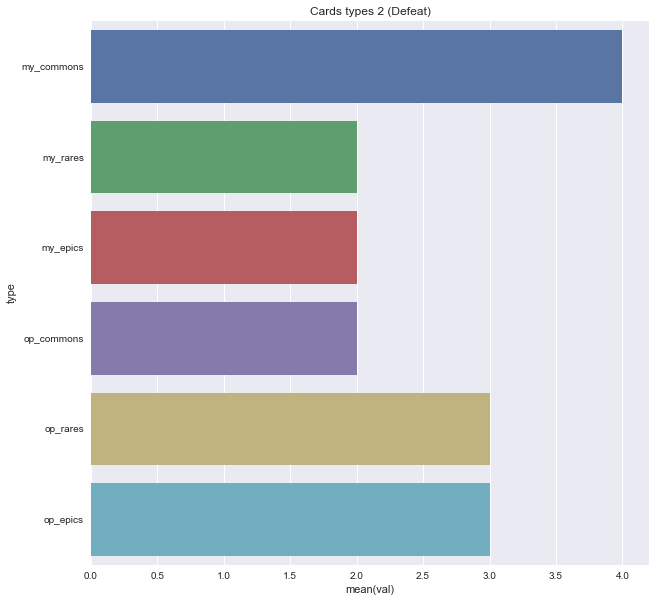

------------------------------------------------

~~~ Arena 1 stats ~~~
Total battles in arena 1: 22
-------
my_result
Defeat      8
Victory    14
Name: arena, dtype: int64


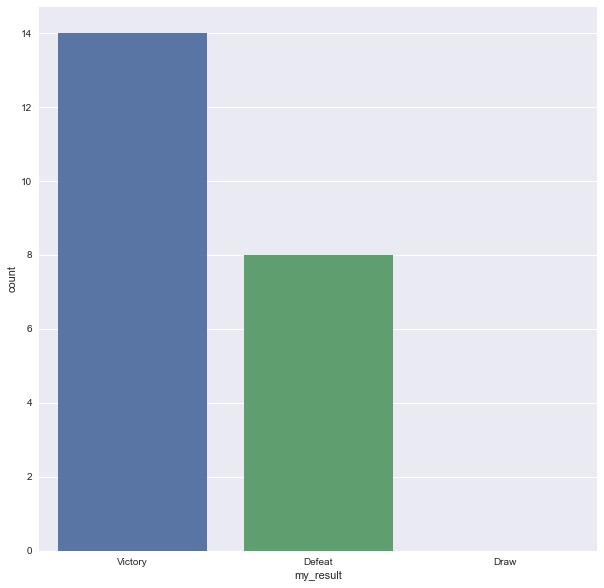

--- Victories ---
Cards types count (median)
     my_troops  my_buildings  my_spells  op_troops  op_buildings  op_spells
50%        5.0           0.0        3.0        6.0           0.0        2.0
----
     my_commons  my_rares  my_epics  op_commons  op_rares  op_epics
50%         4.0       3.0       2.0         3.5       3.0       1.0

Opponents' cards median level
2.0

Top 20 opponents' cards
                Card  Times_Used
0        op_Fireball          13
1           op_Giant          13
2          op_Knight          11
3          op_Arrows          10
4          op_Bomber           8
5     op_Baby_Dragon           8
6         op_Archers           8
7       op_Musketeer           7
8        op_Valkyrie           6
9           op_Witch           5
10  op_Spear_Goblins           4
11  op_Skeleton_Army           4
12     op_Goblin_Hut           3
13      op_Lightning           3
14        op_Goblins           3
15         op_Prince           1

--- Defeats ---
Cards types count (media

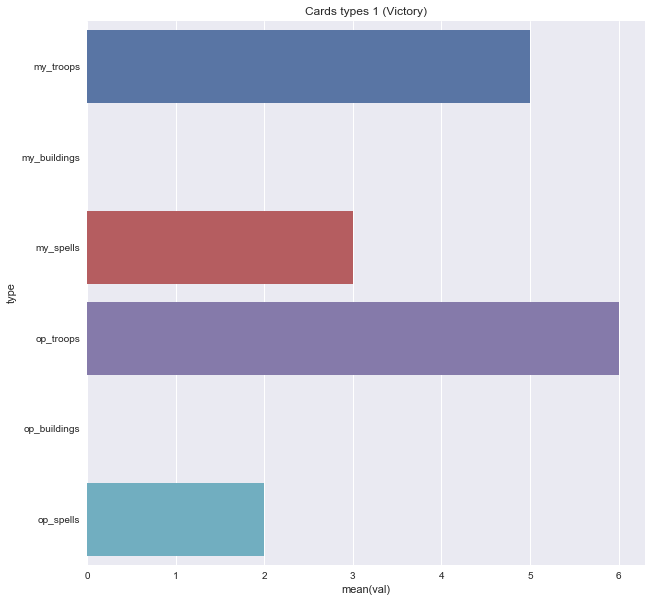

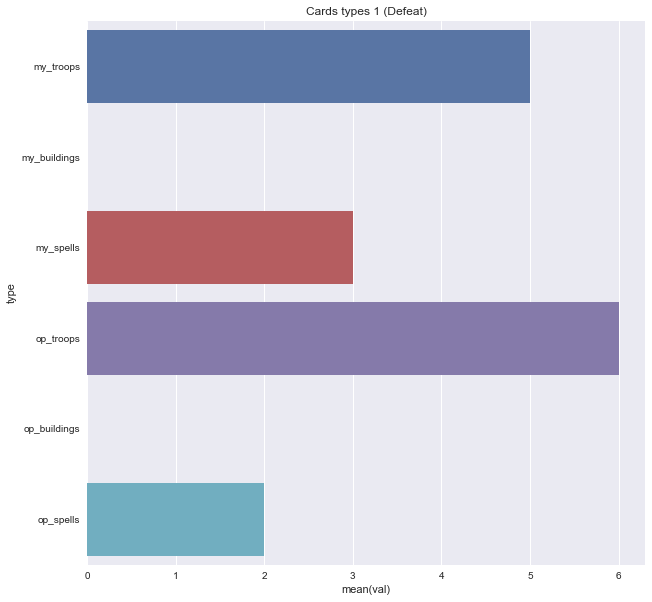

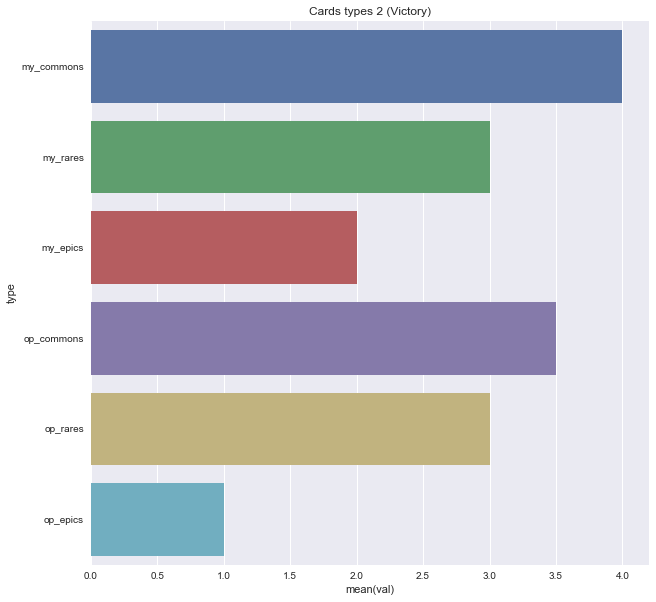

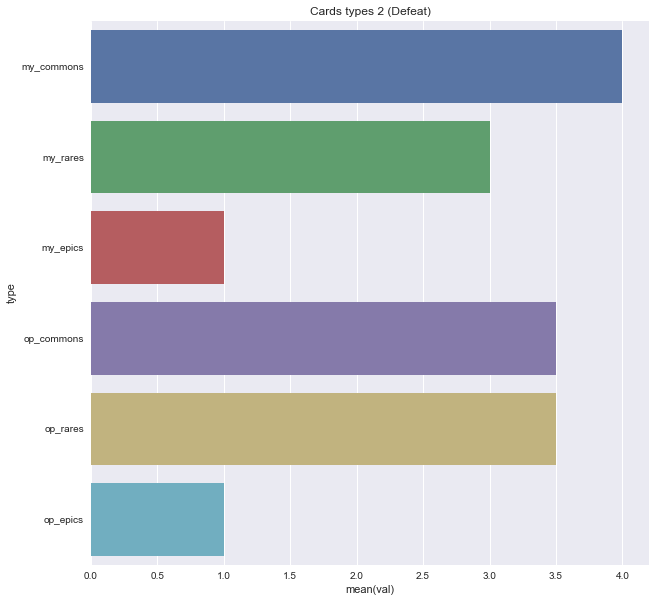

------------------------------------------------



In [108]:
for i in reversed(range(1, 9)):
    print('~~~ Arena %d stats ~~~' % i)
    
    battles_in_arena = df[df.arena == str(i)]
    print('Total battles in arena %d: %d' % (i, battles_in_arena.shape[0]))
    print('-------')
    print(battles_in_arena.groupby(['my_result'])['arena'].count())
    
    sns.plt.figure(figsize=(10, 10))
    (sns.countplot(x=battles_in_arena['my_result'], order=['Victory', 'Defeat', 'Draw']))
    sns.plt.show()    
    
    print('--- Victories ---')
    
    battles_by_vic = battles_in_arena[battles_in_arena.my_result == 'Victory']
    
    print('Cards types count (median)')
    
    cards_types1_vic = (battles_by_vic[['my_troops', 'my_buildings', 'my_spells', 
                                       'op_troops', 'op_buildings', 'op_spells']]
                       .describe())
    
    print(cards_types1_vic.loc[['50%']])
    
    print('----')
    
    cards_types2_vic = (battles_by_vic[['my_commons', 'my_rares', 'my_epics', 
                                        'op_commons', 'op_rares', 'op_epics']]
                       .describe())    
    
    print(cards_types2_vic.loc[['50%']])
    
    
    print('\nOpponents\' cards median level')
    
    print( op_cards_median_level(battles_by_vic) )    
    
    print('\nTop 20 opponents\' cards')

    print(top_op_cards(20, battles_by_vic))
    
    
    print('\n--- Defeats ---')
    
    battles_by_def = battles_in_arena[battles_in_arena.my_result == 'Defeat']
    
    print('Cards types count (median)')
    
    cards_types1_def = (battles_by_def[['my_troops', 'my_buildings', 'my_spells', 
                                       'op_troops', 'op_buildings', 'op_spells']]
                       .describe())    
    
    print(cards_types1_def.loc[['50%']])        
    
    print('----')
    
    cards_types2_def = (battles_by_def[['my_commons', 'my_rares', 'my_epics', 
                                        'op_commons', 'op_rares', 'op_epics']]
                       .describe())       
    
    print(cards_types2_def.loc[['50%']])
    
    
    print('\nOpponents\' cards median level')
    
    print( op_cards_median_level(battles_by_def) )    
    
    print('\nTop 20 opponents\' cards')
    
    print(top_op_cards(20, battles_by_def))
    
    print('----')
    
    sns.plt.figure(figsize=(10, 10))
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types1_vic.columns,
                                                             'val': (cards_types1_vic.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 1 (Victory)')   
    sns.plt.show()

    sns.plt.figure(figsize=(10, 10))
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types1_def.columns,
                                                             'val': (cards_types1_def.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 1 (Defeat)')   
    sns.plt.show()

    sns.plt.figure(figsize=(10, 10))
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types2_vic.columns,
                                                             'val': (cards_types2_vic.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 2 (Victory)')   
    sns.plt.show()    

    sns.plt.figure(figsize=(10, 10))
    sns.barplot(x='val', y='type', data=pd.DataFrame(data={'type': cards_types2_def.columns,
                                                             'val': (cards_types2_def.loc[['50%']]
                                                                     .values.tolist()[0])
                                                          })).set_title('Cards types 2 (Defeat)')   
    sns.plt.show()  


    
    
    print('------------------------------------------------\n')